# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

from sklearn.pipeline import Pipeline         

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [141]:
data = pd.read_csv(
    "~/Desktop/Projects/Segmentation_clients/data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [142]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [144]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


**Промежуточный вывод** В среднем количество каждого товара за транзакцию 9(шт), максимум и минимум(возврат) очень большие числа, скорее всего оптовики. Насчет цены за штуку, то в среднем цена за одну единицу товара 5 фунтов, минимум -11тысяч(возврат) и максимум 38970 фунтов 

In [145]:
print(f'Количество уникальных клиентов: {data['CustomerID'].nunique()}')

Количество уникальных клиентов: 4372


In [146]:
print(f'Список стран, из которых совершались транзакции: \n{data['Country'].unique()}')

Список стран, из которых совершались транзакции: 
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [147]:
print(f'Количество пропусков: {data.isnull().sum().sum()}')

Количество пропусков: 136534


In [148]:
print(f'Дубликаты: {data.duplicated().sum()}')

Дубликаты: 5268


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


Построим тепловую карту пропусков столбца CustomerID и Description

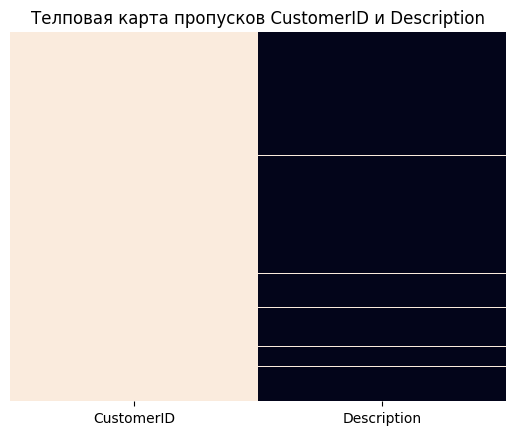

In [149]:
missing = data[data['CustomerID'].isnull() | data['Description'].isnull()]
sns.heatmap(missing[['CustomerID','Description']].isnull(), cbar=False, yticklabels=False)
plt.title('Телповая карта пропусков CustomerID и Description')
plt.show()

In [150]:
data.dropna(subset=['CustomerID'], inplace=True)

In [151]:
print(f'Количество пропусков после предобработки: {data.isna().sum().sum()}')

Количество пропусков после предобработки: 0


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [152]:
data.drop_duplicates(inplace=True)

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [153]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

`get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.



In [154]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов с учётом распределения возвратов по нескольким покупкам.
    
    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и таблица
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        
        # Транзакция-возврат не имеет контрагента — помечаем NaN
        if df_test.shape[0] == 0: 
            quantity_canceled.loc[index] = np.nan
        
        # Транзакция-возврат имеет одного или нескольких контрагентов
        else:  
            # Сортируем по индексу по убыванию, как в оригинальном коде
            df_test.sort_index(axis=0, ascending=False, inplace=True)
            
            remaining_return = -col['Quantity']  # остаток возврата
            
            for ind, val in df_test.iterrows():
                if remaining_return <= 0:
                    break  # возврат полностью распределён
                
                # Сколько из этой покупки может покрыть возврат
                canceled = min(val['Quantity'], remaining_return)
                
                quantity_canceled.loc[ind] = canceled
                
                remaining_return -= canceled  # уменьшаем оставшийся возврат
                
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [155]:
# Удаляем пропуски в столбце отмененных заказов
data.dropna(subset=['QuantityCanceled'], inplace=True)

In [156]:
# отбираем только те транзакции, где колво больше 0
data = data[data['Quantity'] > 0]

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [157]:
# Выделяем в маску специальные операции и убираем их 
transaction_mask = data['StockCode'].str.match(r'^[a-zA-z]+')
data = data[~transaction_mask]

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [158]:
# Осталвяем только транзакции, у которых цена больше нуля
data = data[data['UnitPrice'] > 0]

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [159]:
# Считаем общую выручку с учетом отмененныз заказов
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])

In [160]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


Добавим признак категории цены low,mid,high. В моем понимании это полезно оценить покупательскую способность

In [161]:
# Создаём бины
bins = [0, 5, 20, data['UnitPrice'].max()]

# Создаём категорию
data['PriceCategory_numeric'] = pd.cut(data['UnitPrice'], bins=bins, labels=[0, 1, 2])

# Преобразуем в int
data['PriceCategory_numeric'] = data['PriceCategory_numeric'].astype(int)

# Проверяем распределение
print(data['PriceCategory_numeric'].value_counts())

PriceCategory_numeric
0    341747
1     48735
2       668
Name: count, dtype: int64


Также добавим признак месяца и дня денели, то бишь сезонность  

In [162]:
# Выделяем нужные нам признаки
data['Month'] = data['InvoiceDate'].dt.month
data['Weekday'] = data['InvoiceDate'].dt.weekday # 0 - понедельник

Добавим сезонность 

In [163]:
def month_to_season(month):
    """
    Определяет сезон по номеру месяца.

    Args:
        month (int): Номер месяца (1 = январь, ..., 12 = декабрь).

    Returns:
        str: Название сезона ('Winter', 'Spring', 'Summer', 'Autumn').
    """
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Применяем функцию к столбцу с месяцами
data['Season'] = data['Month'].apply(month_to_season)

Добавим общее количество товаров в заказе

In [164]:
# Группируем данные по номеру фактуры и считаем уникальные товары
items_per_invoice = data.groupby('InvoiceNo')['StockCode'].nunique().reset_index()
# Ренейм столбцов
items_per_invoice.rename(columns={'StockCode': 'NumDistinctProducts'}, inplace=True)
# Мерджим таблицу с мейн таблицей 
data = data.merge(items_per_invoice, on='InvoiceNo', how='left')

In [165]:
data.head(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,PriceCategory_numeric,Month,Weekday,Season,NumDistinctProducts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30,0,12,2,Winter,7
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,0,12,2,Winter,7
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00,0,12,2,Winter,7
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,0,12,2,Winter,7
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,0,12,2,Winter,7
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0.0,15.30,1,12,2,Winter,7
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0.0,25.50,0,12,2,Winter,7
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0.0,11.10,0,12,2,Winter,2


In [166]:
# Сохранаяем таблицу в csv формат 
data.to_csv('~/Desktop/Projects/Segmentation_clients/data/data_clean.csv', index=False)

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



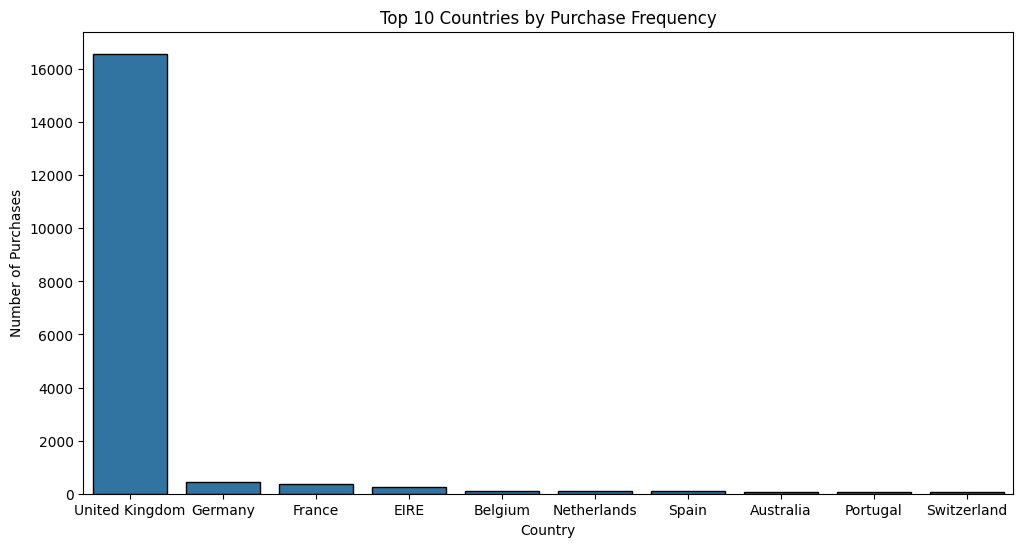

In [167]:
# Группируем данные по странам и смотрим уникальное колво InvoiceNo
country_freq = data.groupby('Country')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo', ascending=False).head(10)
# Столбчатая диаграмма
plt.figure(figsize=(12, 6))
sns.barplot(data=country_freq, x='Country', y='InvoiceNo')
plt.ylabel('Number of Purchases')
plt.xlabel('Country')
plt.title('Top 10 Countries by Purchase Frequency')
plt.show()

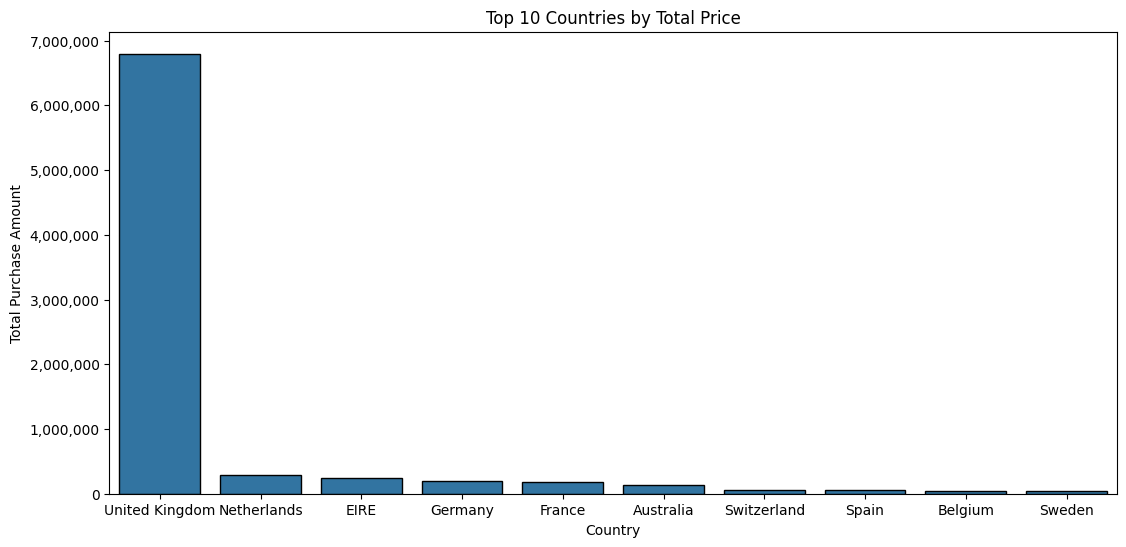

In [168]:
from matplotlib.ticker import StrMethodFormatter
# Группируем данные по странам и считаем сумму их покупок
country_sales = data.groupby(by='Country')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False).head(10)

# Столбчатая диаграмма 
plt.figure(figsize=(13, 6))
sns.barplot(data=country_sales, x='Country', y='TotalPrice')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Country')
plt.title('Top 10 Countries by Total Price')

# Показываем числа обычным образом, без e6
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

**Промежуточный вывод:**
Из-за того, что в данных преобладает количество покупателей из Великобритании, её отрыв по количеству заказов значительно больше, чем у других стран. 
Важно отметить, что количество заказов не всегда соответствует общей сумме покупок. Например, Ирландия делает меньше заказов, чем Германия или Франция, однако общая сумма её покупок выше, что может говорить о покупке более дорогих товаров или крупных заказов.

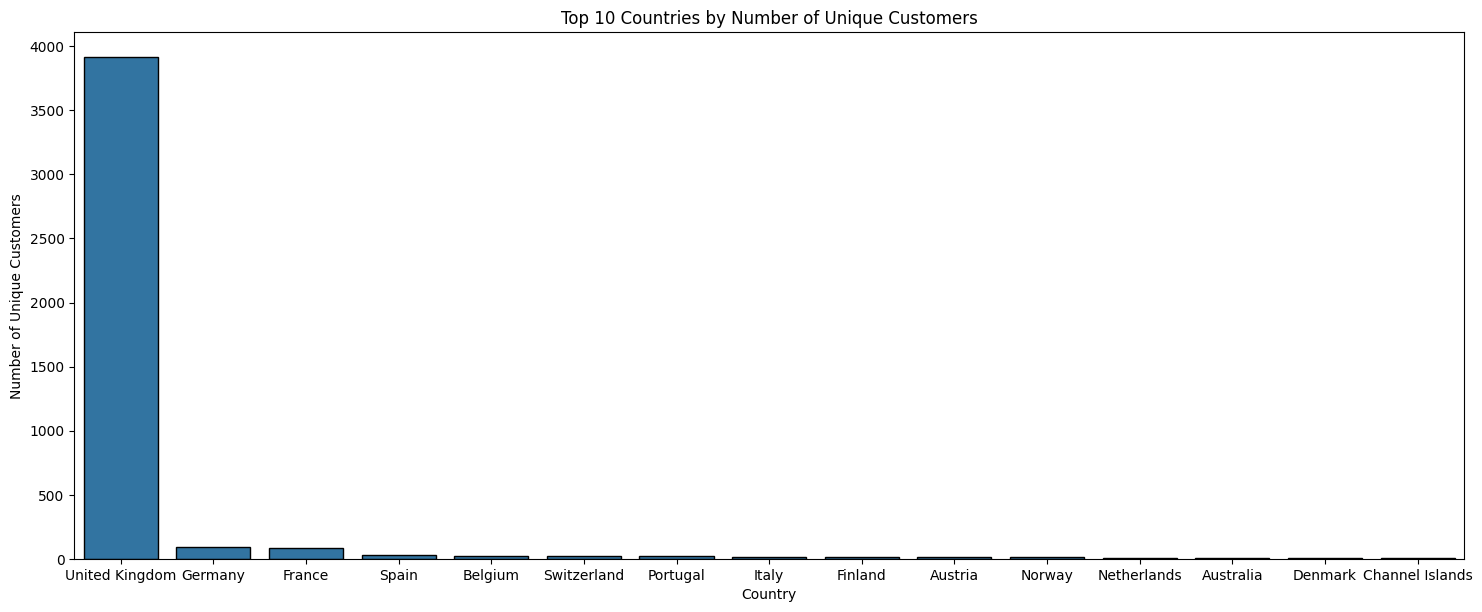

In [169]:
# Группируем данные по странам и считаем уникальных покупателей
country_clients = data.groupby('Country')['CustomerID'].nunique().reset_index().sort_values(by='CustomerID', ascending=False).head(15)
# Столбачатая диаграмма 
plt.figure(figsize=(15, 6))
sns.barplot(data=country_clients, x='Country', y='CustomerID')
plt.ylabel('Number of Unique Customers')
plt.xlabel('Country')
plt.tight_layout()
plt.title('Top 10 Countries by Number of Unique Customers')
plt.show()

**Промежуточный вывод:**
Анализ количества уникальных покупателей позволяет выявить, какие страны имеют больше розничных клиентов. 
Например, Ирландия по количеству покупателей не входит в топ-15, однако по общей сумме покупок она находится в топ-3. Это говорит о том, что клиенты из Ирландии делают реже, но более крупные заказы.

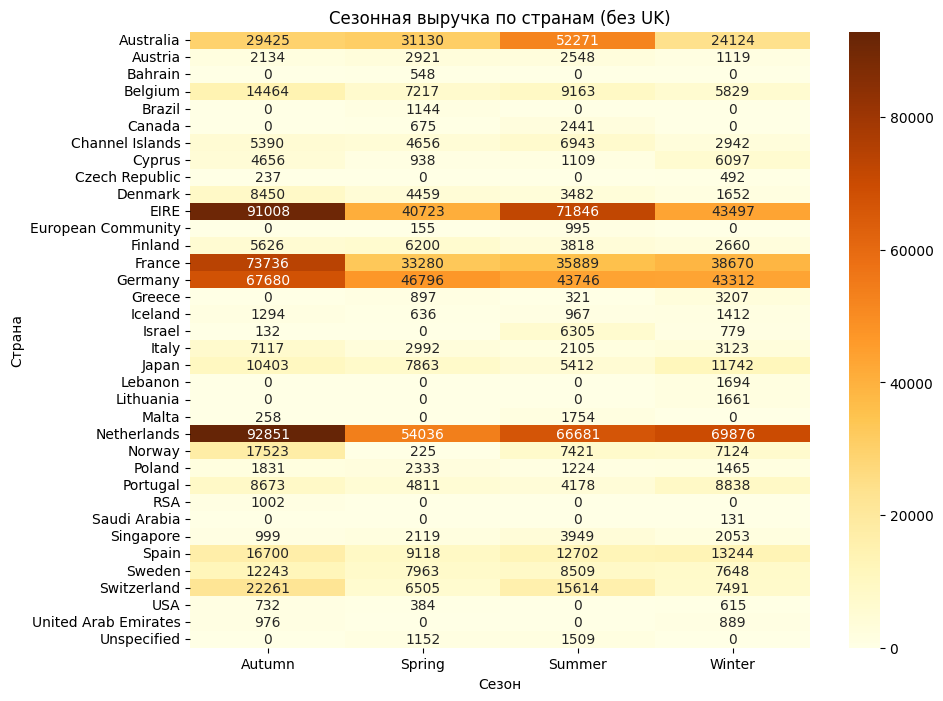

In [170]:
# СТроим сводную таблицу без UK
pivot = pd.pivot_table(
    data=data[data['Country'] != 'United Kingdom'],
    index='Country',
    columns='Season',
    values='TotalPrice',
    aggfunc='sum'
).fillna(0)
# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Сезонная выручка по странам (без UK)")
plt.ylabel("Страна")
plt.xlabel("Сезон")
plt.show()

**Промежуточный вывод**: Решил Великобританию убрать из анализа, так как она перекрывает другие страны. На графике видно, что осенью например максимальную выручку (TotalPrice) выдают Ирландия, Нидерланды, Германия и Франция. Также в другие времена года эти страны показывают максимальную выручку. Только летом добавляется Австралия. Но это было без Великобритании, так именно это страна лиедр во все сезоны по выручке

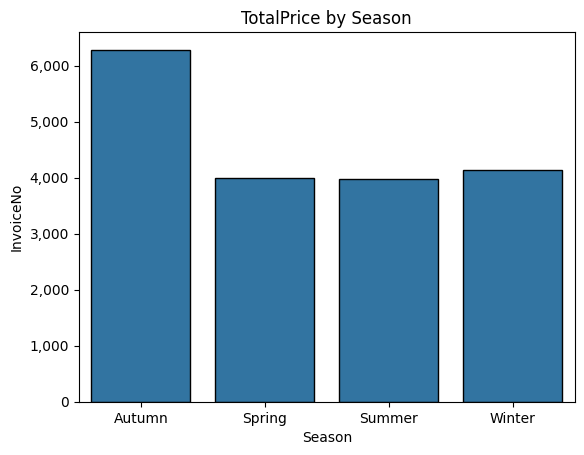

In [171]:
# Группируем данные по сезону и считаем уникальные номера фактуры
season_totalprice = data.groupby('Season')['InvoiceNo'].nunique().reset_index()

# Строим столбчатую диаграмму 
sns.barplot(season_totalprice, x='Season', y='InvoiceNo')
plt.title('TotalPrice by Season')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

**Промежуточный вывод**:
На графике можно заметить отчетливую разницу. Осенью практически в полтора раза покупают товары чаще, чем в другие сезоны. Летом, зимой и весной товары покупаются примерно равномерно

In [172]:
# Выделяем час и дату 
data['Hour'] = data['InvoiceDate'].dt.hour 
data['Date'] = data['InvoiceDate'].dt.date

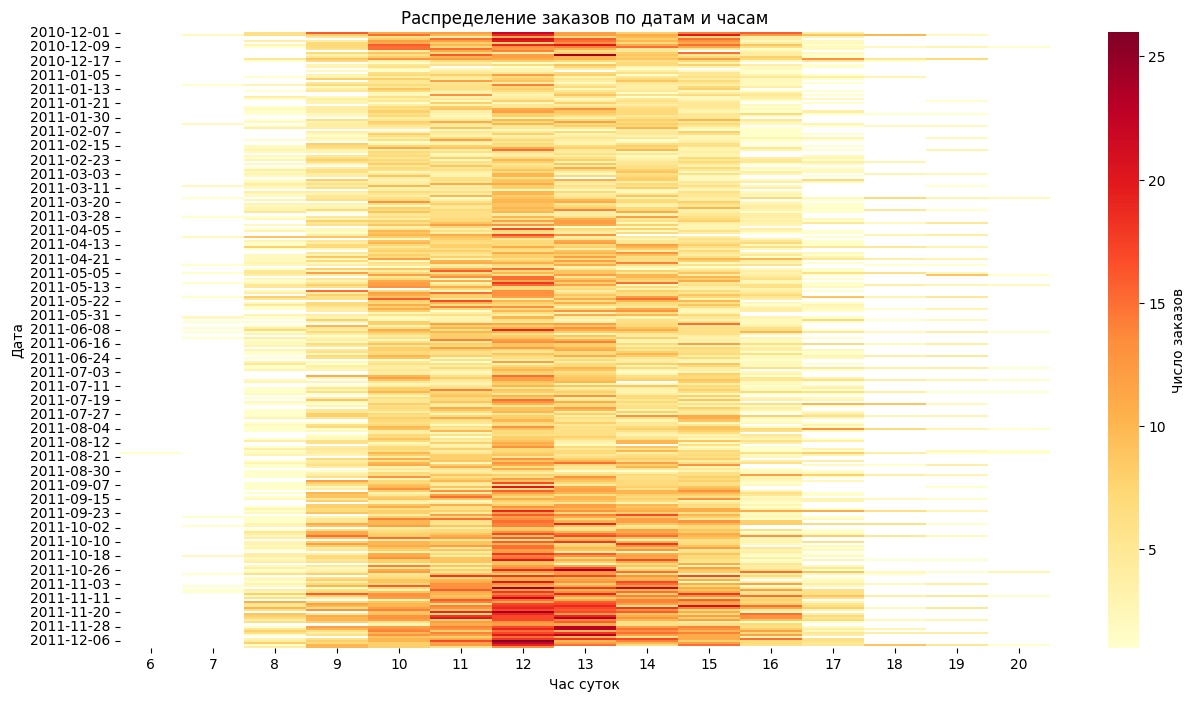

In [173]:
# Группируем данные по дате-час
order_per_day_hour = data.groupby(['Date', 'Hour'])['InvoiceNo'].nunique().reset_index()
# Ренеймим столбцы
order_per_day_hour.rename(columns={'InvoiceNo': 'NumOrders'}, inplace=True)

# Строим матрицу дата–час
heatmap_data = order_per_day_hour.pivot(index='Date', columns='Hour', values='NumOrders')

# Строим тепловую крату
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Число заказов'})
plt.title("Распределение заказов по датам и часам")
plt.xlabel("Час суток")
plt.ylabel("Дата")
plt.show()

**Промежуточный вывод:** На тепловой карте видно, что вечером и утром практически нет заказов вне зависимости от даты. Пик заказов обычно приходится на полдень, примерно 12-13 часов дня.

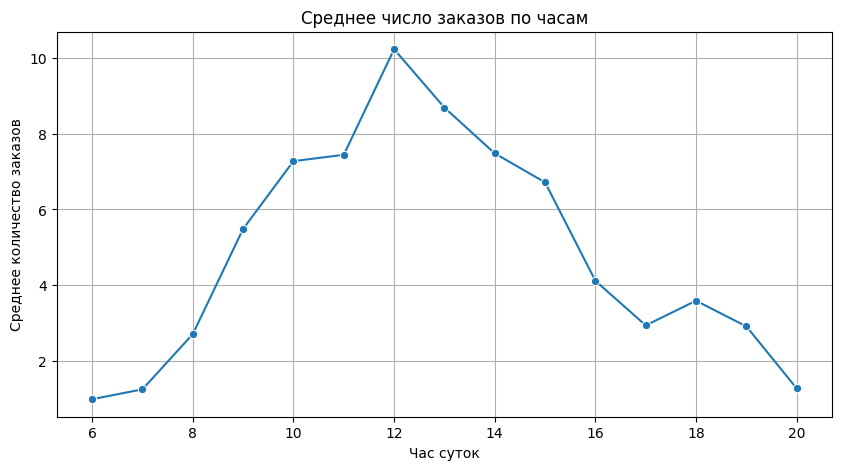

In [174]:
# Группируем наши уже сгруппированные данные и берем среднее количество заказов по часам
avg_orders_per_hour = order_per_day_hour.groupby('Hour')['NumOrders'].mean().reset_index()
# Строим лайнплот 
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_orders_per_hour, x='Hour', y='NumOrders', marker='o')
plt.title("Среднее число заказов по часам")
plt.xlabel("Час суток")
plt.ylabel("Среднее количество заказов")
plt.grid(True)
plt.show()

**Промежуточный вывод:** По графику видно что пик средних заказов достигается в 12 часов(как мы ранее и указали на тепловой карте) к вечеру среднее кол-во падает. Меньше всего в 8 часов вечера и в 6 часов утра, что в принципе, и, логично

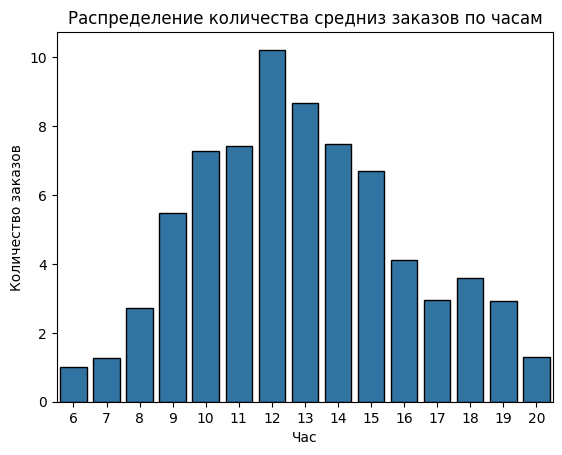

In [175]:
# Столбчатая диаграмма
sns.barplot(data=avg_orders_per_hour, x='Hour', y='NumOrders')
plt.title('Распределение количества средниз заказов по часам')
plt.xlabel('Час')
plt.ylabel('Количество заказов')
plt.show()

**Промежуточный вывод:** на графике можем четко посмотреть распределения среденго колва заказов по часам. На графике видно, что пик средних заказов приходится на 12 часов дня. В принципе примерно такую же картину мы видели на графике во времени.


In [176]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,PriceCategory_numeric,Month,Weekday,Season,NumDistinctProducts,Hour,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30,0,12,2,Winter,7,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,0,12,2,Winter,7,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00,0,12,2,Winter,7,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,0,12,2,Winter,7,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,0,12,2,Winter,7,8,2010-12-01


Text(0, 0.5, 'Количество')

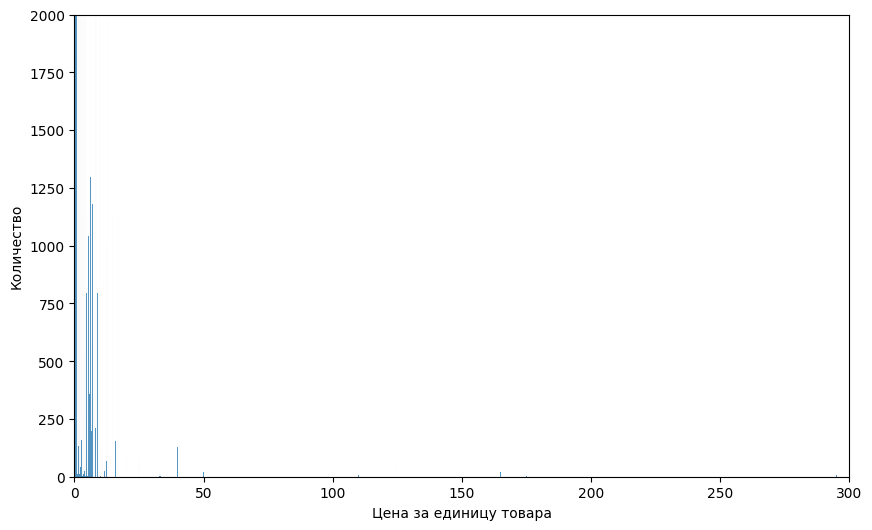

In [177]:
# Диаграмма распределения
plt.figure(figsize=(10, 6))
sns.histplot(data['UnitPrice'])
plt.xlim(0, 300)
plt.ylim(0, 2000)
plt.xlabel('Цена за единицу товара')
plt.ylabel('Количество')

**Промежуточный вывод:** Видно, что основная масса распределния сосредоточена близ нуля, то есть преобладают (если судить по нашей категории) дешевые товары, и есть очень жирный хвост, это означает что таких товаров намного меньше

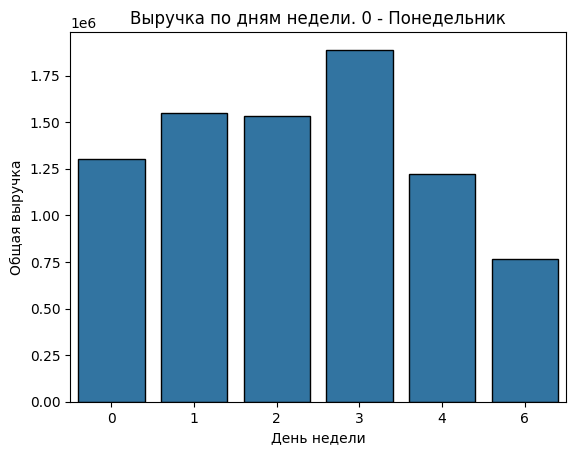

In [178]:
# Группируем данные по дням и считаем общую выручку
totalprice_by_weekday = data.groupby('Weekday')['TotalPrice'].sum().reset_index()
# Столбчатая диаграмма
sns.barplot(data=totalprice_by_weekday, x='Weekday', y='TotalPrice')
plt.title('Выручка по дням недели. 0 - Понедельник')
plt.xlabel('День недели')
plt.ylabel('Общая выручка')
plt.show()

**Промежуточный вывод:** На графике можем заметить, что максимальная сумма выручки достигается в четверг, в первые дни недели примерно распределние равномерное, и к выходным выручка падает

Признаки удалять не вижу смысла, если мы их добавляли просто для анализа. Все равно будем работать только с rfm признаками

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [179]:
# Наша максимальная дата
t0 = pd.to_datetime('2011-12-10 00:00:00')

# Создаем сводную таблицу rfm признаков
rfm_table = data.pivot_table(
    index='CustomerID',
    values=['InvoiceDate', 'InvoiceNo', 'TotalPrice'],
    aggfunc={
        'InvoiceDate': lambda x: (t0 - x.max()).days,
        'InvoiceNo': 'nunique',
        'TotalPrice': 'sum'
    }
).rename(columns=({'InvoiceDate': 'Recency',
                  'InvoiceNo': 'Frequency',
                  'TotalPrice': 'Monetary Value'}))
rfm_table

,Recency,Frequency,Monetary Value
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,176.60


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [180]:
# Наши коробки с усами
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
# Создаем полотно, на котором будет три графика
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.

In [181]:
# Удаялем выбросы через квантиль 0.95 уровня
rfm_cleaned = rfm_table[
    (rfm_table['Frequency'] <= rfm_table['Frequency'].quantile(0.95)) & 
    (rfm_table['Monetary Value'] <= rfm_table['Monetary Value'].quantile(0.95))
]

In [182]:
rfm_cleaned

,Recency,Frequency,Monetary Value
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18278,73,1,173.90
18280,277,1,180.60
18281,180,1,80.82


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


Понижение в нашем случае не так важно из за маленького количества признаков, но в целях учебы я все таки его добавил как обязательный шаг, потому что обычно бывает так, что признаков очень много

In [183]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA 

# Выделяем наши рфм признаки в нумпай массив
X = rfm_cleaned.values 


def evaluate_models(X, k_range=range(3, 11)):
    """
    Подбор оптимальной модели кластеризации и числа кластеров по коэффициенту силуэта.
    
    Проверяются: KMeans, AgglomerativeClustering, GaussianMixture.
    Перед кластеризацией данные стандартизируются и уменьшаются до 2 компонент (PCA).

    Параметры:
        X : ndarray — матрица признаков (RFM-таблица).
        k_range : range — диапазон для перебора числа кластеров.

    Возвращает:
        results_df : DataFrame — таблица с результатами (модель, k, силуэт).
        best : dict — информация о лучшей модели.
    """

    results = []
    best = {
        "score": -1,     # лучший силуэт
        "name": None,    # название модели
        "k": None,       # число кластеров
        "labels": None,  # метки кластеров
        "model": None,   # обученная модель
        "scaler": None   # скейлер
    }

    for k in k_range:
        models = {
            "KMeans": KMeans(n_clusters=k, n_init=10, random_state=42),
            "Agglomerative": AgglomerativeClustering(n_clusters=k),
            "GMM": GaussianMixture(n_components=k, random_state=42)
        }

        for name, clusterer in models.items():
            # pipeline: стандартизация → PCA → кластеризация
            pipe = Pipeline([
                ("scaler", StandardScaler()),
                ("pca", PCA(n_components=2)),
                ("cluster", clusterer)
            ])

            labels = pipe.fit_predict(X)  # получаем метки
            score = silhouette_score(pipe[:-1].transform(X), labels)  # берем из пайплайна шаги до кластеризации самой, тк метки у нас уже есть

            results.append({"model": name, "k": k, "silhouette": score})

            if score > best["score"]:  # обновляем лучшую модель
                best.update({
                    "score": score,
                    "name": name,
                    "k": k,
                    "labels": labels,
                    "model": clusterer,
                    "scaler": pipe.named_steps["scaler"]
                })

    return pd.DataFrame(results).sort_values("silhouette", ascending=False), best

results_df, best = evaluate_models(X)

print(f"Лучшая модель: {best['name']} (k={best['k']}), силуэт = {best['score']:.3f}")

Лучшая модель: KMeans (k=3), силуэт = 0.524


In [184]:
# Скопируем наш датасет и добавим туда кластеры
rfm_with_clusters = rfm_cleaned.copy()
rfm_with_clusters['cluster'] = best['labels']

**Промежуточный вывод:** Наиболший силуэт скор дал метод kmeans  с тремя кластерами (0.52)

### 3.2. Интерпретация результатов кластеризации

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

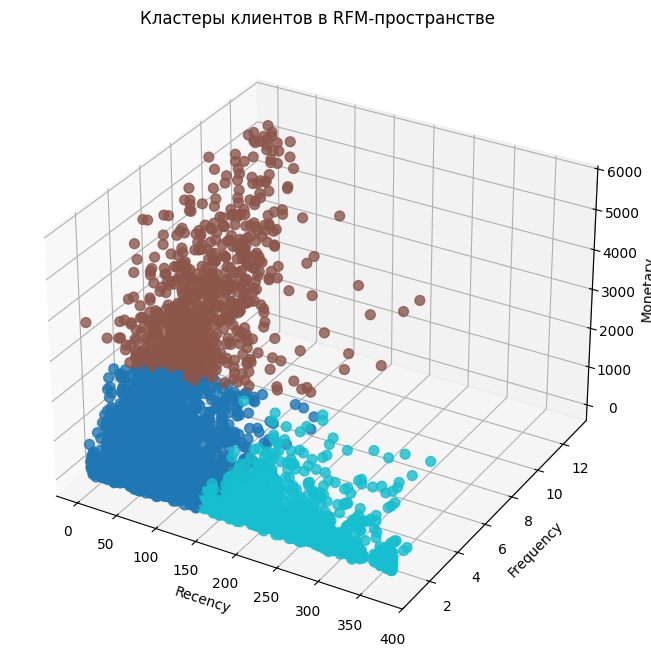

In [185]:
# Фигура, на которой будет наш график
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# Скаттер плот рфм таблицей с разделением на кластеры
ax.scatter(
    rfm_with_clusters['Recency'],
    rfm_with_clusters['Frequency'],
    rfm_with_clusters['Monetary Value'],
    c=rfm_with_clusters['cluster'],
    cmap='tab10', 
    s=50, 
    alpha=0.8
)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Кластеры клиентов в RFM-пространстве')
plt.show()

**Промежуточный вывод:** На графике мы видим три кластера. Коричневым цветом выделены так называемые лояльные клиенты, у которых Высокое Freq и MV, а Recency маленькое. Эта аудитория основа нашего бизнеса, их нужно максимально стараться удерживать, предлагать персональные рекомендации, поощрять лоялность. Второй кластер(синий) - новички, все метрики низкого значения, то есть они только начали у нас покупать, потенциальная аудитория. Их нужно максимально вовлекать в процесс покупок, предлагая различные акции и скидки. Цель - перевести их в коричневый кластер. И третий кластер - уходящие клиенты, у которых последний заказ был давно. Как то нужно наладить обратную связь и постараться вернуть их к покупкам

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

In [186]:
# Группируем данные по кластерам и считаем среднее rfm признаков
rfm_grouped = rfm_with_clusters.groupby('cluster')[['Recency', 'Frequency', 'Monetary Value']].mean()
rfm_grouped

,Recency,Frequency,Monetary Value
cluster,,,
0,51.127481,2.329069,660.031125
1,31.943299,7.068299,2657.704974
2,253.283716,1.405594,386.715155


In [187]:
from sklearn import preprocessing

def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

plot_cluster_profile(rfm_grouped, n_clusters=best["k"])

**Промежуточный вывод:** На основе проведенной RFM-сегментации клиентская база была разделена на три четко выраженных кластера, каждый из которых требует уникального подхода в коммуникации и стратегии взаимодействия. Полярная диаграмма полностью подтвердила вывод, сделанный на 3д скаттер плоте

## 5. Выводы и оформление работы

**Заключение:** Таким образом, RFM-сегментация позволила выделить три ключевых кластера клиентов — лояльных, новичков и уходящих. Каждый кластер требует индивидуального подхода: удержание и премиальные программы для лояльных, вовлечение и стимулирующие предложения для новичков, а для уходящих — реанимационные кампании и персонализированные коммуникации. Такой подход обеспечивает эффективное управление клиентской базой и повышает ценность взаимодействия с клиентами.